# Purpose

Here we consider the QUBO problem $f(z) = J\sum_{i<j}z_iz_j + \sum_{i=1}^6h_iz_i$ for the hexagon shown in the left panel below. We assume $J<0$ and $h_i\geq0$, and we consider the following cases

1. $0\leq h_i<1$, which yields $z_i=1$
2. $h_i=1$, which yields two solutions $z_i=0$ or $z_i=1$
3. $h_i>1$, which yields $z_i=0$

We will see that these scenario can be reproduced via the encoding shown in the right panel below, where we insert an atom into the center of each bond of the hexagon. The central atom implement the effective $J<0$ interaction between the atoms on the vertices of the hexagon. 

We only consider one hexagon in this book. 

<div>
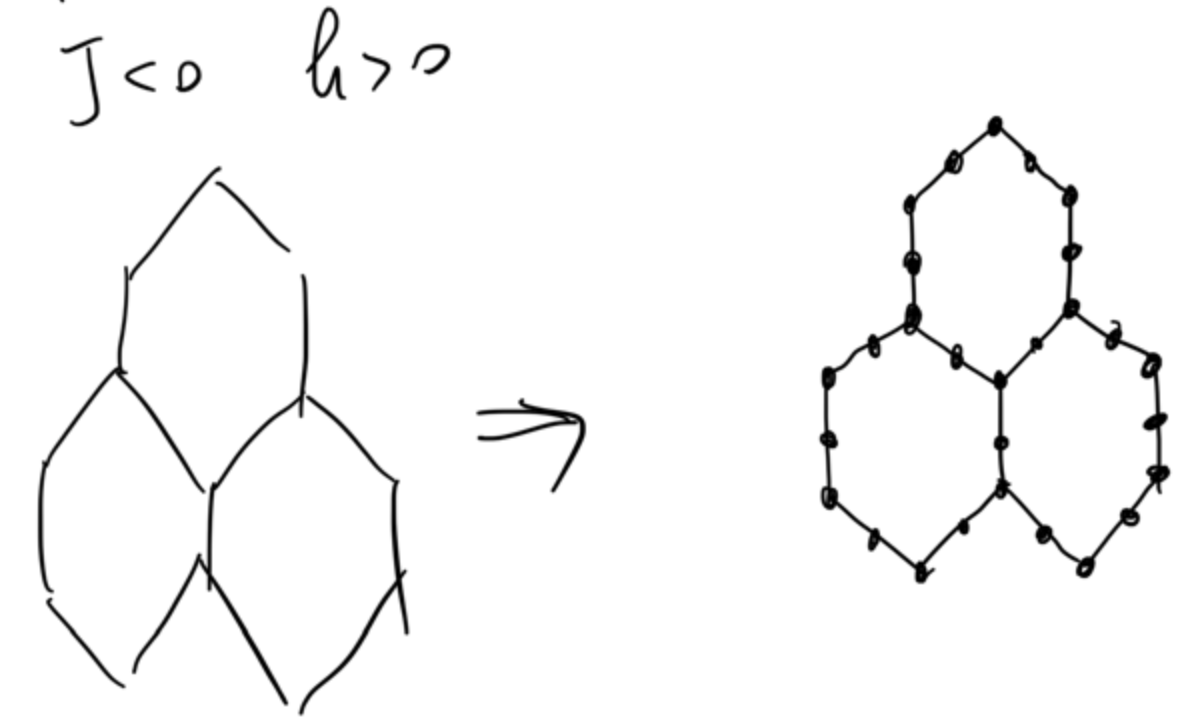
</div>

In [1]:
import functools as ft
import numpy as np

In [2]:
def tensor(N, indices):
    """Return the tensor product of a set of binary variables
    
    Example 1: 
        tensor(2, [0, 1]) = array([0, 0, 0, 1]) represents x0x1 with N=2 variables
    
    Example 2: 
        tensor(3, [0, 1]) = array([0, 0, 0, 0, 0, 0, 1, 1]) represents x0x1 with N=3 variables    
        
    Example 3: 
        tensor(3, [0, 2]) = array([0, 0, 0, 0, 0, 1, 0, 1]) represents x0x2 with N=3 variables    
        
    Example 4: 
        tensor(3, [1]) = array([0, 0, 1, 1, 0, 0, 1, 1]) represents x1 with N=3 variables    
        
    Example 5: 
        tensor(3, [0,1,2]) = array([0, 0, 0, 0, 0, 0, 0, 1]) represents x0x1x2 with N=3 variables    
        
    """
    
    list_binary_variables = [(1, 1) for _ in range(N)]
    for ind in indices:
        list_binary_variables[ind] = (0, 1)
        
    return ft.reduce(np.kron, list_binary_variables)

In [3]:
# The original problem
def QUBO(h, J=-1.0):
    if type(h) != list:
        h = [float(h) for _ in range(6)]

    H = 0 
    # Add the quadratic term
    for i in range(6):
        if i==5:
            H += J * tensor(6, [5, 0])
        else:
            H += J * tensor(6, [i, i+1])
    
    # Add the linear tearm
    for i in range(6):
        H += h[i] * tensor(6, [i])
    
    min_val = min(H)
    min_val_indices = [i for i in range(len(H)) if H[i]==min_val]
    configs = [f'{index:06b}' for index in min_val_indices]
    
    return H, (min_val, min_val_indices), configs

In [4]:
# If linear term is 0, all the varibles tend to be 1
QUBO(0)

(array([ 0.,  0.,  0., -1.,  0.,  0., -1., -2.,  0.,  0.,  0., -1., -1.,
        -1., -2., -3.,  0.,  0.,  0., -1.,  0.,  0., -1., -2., -1., -1.,
        -1., -2., -2., -2., -3., -4.,  0., -1.,  0., -2.,  0., -1., -1.,
        -3.,  0., -1.,  0., -2., -1., -2., -2., -4., -1., -2., -1., -3.,
        -1., -2., -2., -4., -2., -3., -2., -4., -3., -4., -4., -6.]),
 (-6.0, [63]),
 ['111111'])

In [5]:
# If linear term is 0.5, all the varibles tend to be 1
QUBO(0.5)

(array([ 0. ,  0.5,  0.5,  0. ,  0.5,  1. ,  0. , -0.5,  0.5,  1. ,  1. ,
         0.5,  0. ,  0.5, -0.5, -1. ,  0.5,  1. ,  1. ,  0.5,  1. ,  1.5,
         0.5,  0. ,  0. ,  0.5,  0.5,  0. , -0.5,  0. , -1. , -1.5,  0.5,
         0. ,  1. , -0.5,  1. ,  0.5,  0.5, -1. ,  1. ,  0.5,  1.5,  0. ,
         0.5,  0. ,  0. , -1.5,  0. , -0.5,  0.5, -1. ,  0.5,  0. ,  0. ,
        -1.5, -0.5, -1. ,  0. , -1.5, -1. , -1.5, -1.5, -3. ]),
 (-3.0, [63]),
 ['111111'])

In [6]:
# Transition point where |J| = |h|
QUBO(1.0)

(array([0., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1.,
        2., 2., 2., 2., 3., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1.,
        2., 1., 2., 2., 2., 1., 2., 2., 3., 2., 2., 2., 2., 1., 1., 1., 2.,
        1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 0.]),
 (0.0, [0, 63]),
 ['000000', '111111'])

In [7]:
# If linear term is 1.5, all the varibles tend to be 0
QUBO(1.5)

(array([0. , 1.5, 1.5, 2. , 1.5, 3. , 2. , 2.5, 1.5, 3. , 3. , 3.5, 2. ,
        3.5, 2.5, 3. , 1.5, 3. , 3. , 3.5, 3. , 4.5, 3.5, 4. , 2. , 3.5,
        3.5, 4. , 2.5, 4. , 3. , 3.5, 1.5, 2. , 3. , 2.5, 3. , 3.5, 3.5,
        3. , 3. , 3.5, 4.5, 4. , 3.5, 4. , 4. , 3.5, 2. , 2.5, 3.5, 3. ,
        3.5, 4. , 4. , 3.5, 2.5, 3. , 4. , 3.5, 3. , 3.5, 3.5, 3. ]),
 (0.0, [0]),
 ['000000'])

In [8]:
# If linear term is 2.0, all the varibles tend to be 0
QUBO(2.0)

(array([0., 2., 2., 3., 2., 4., 3., 4., 2., 4., 4., 5., 3., 5., 4., 5., 2.,
        4., 4., 5., 4., 6., 5., 6., 3., 5., 5., 6., 4., 6., 5., 6., 2., 3.,
        4., 4., 4., 5., 5., 5., 4., 5., 6., 6., 5., 6., 6., 6., 3., 4., 5.,
        5., 5., 6., 6., 6., 4., 5., 6., 6., 5., 6., 6., 6.]),
 (0.0, [0]),
 ['000000'])

In [9]:
# Embed the problem to Rydberg system
def QUBO_Ryd(h, J=-1.0): 
    if type(h) != list:
        h = [float(h) for _ in range(6)]
    
    # U is the Rydberg-Rydberg interaction, which is always positive
    # Here we take it to be a big positive number, but its magnitude is tunable
    U = 10.0
        
    # The global detuning for the atoms. Needs to be negative
    # Here we pick a very small value, but its precise range needs to be investigated further
    delta = -0.01
    
    H = 0 

    # Add the interaction term for the atoms
    for i in range(6*2): # Each variable is represented by 2 atoms
        if i == 11:
            H += U * tensor(12, [11, 0])
        else:
            H += U * tensor(12, [i, i+1])
            
    
    # Add the detunings for the atoms
    # Here the even-index atoms are the atoms correspond to the original variables
    # The odd-index atoms are used to enforce the unit disk condition and negative coupling
    for i in range(6):
        H += (J + h[i]+delta) * tensor(12, [2*i])
        H += delta * tensor(12, [2*i+1])
    
    min_val = min(H)
    min_val_indices = [i for i in range(len(H)) if H[i]==min_val]
    configs = [f'{index:012b}' for index in min_val_indices]
    
    return H, (min_val, min_val_indices), configs

In [10]:
# If linear term is 0, all the varibles tend to be 1
# Correspondingly, all the even indexed atoms [0, 2, 4, 6, 8, 10] tend to be 1
QUBO_Ryd(0)

(array([ 0.0000e+00, -1.0000e-02, -1.0100e+00, ...,  9.4890e+01,
         9.3890e+01,  1.1388e+02]),
 (-6.06, [2730]),
 ['101010101010'])

In [11]:
# If linear term is 0.5, all the varibles tend to be 1
# Correspondingly, all the even indexed atoms [0, 2, 4, 6, 8, 10] tend to be 1

QUBO_Ryd(0.5)

(array([ 0.0000e+00, -1.0000e-02, -5.1000e-01, ...,  9.7390e+01,
         9.6890e+01,  1.1688e+02]),
 (-3.0599999999999996, [2730]),
 ['101010101010'])

In [12]:
# Transition point where |J| = |h|
# Here we have two solutions. The 1st one has all even indexed atoms at 1
# The 2nd one has all even indexed atoms at 0
QUBO_Ryd(1.0)

(array([ 0.0000e+00, -1.0000e-02, -1.0000e-02, ...,  9.9890e+01,
         9.9890e+01,  1.1988e+02]),
 (-0.060000000000000005, [1365, 2730]),
 ['010101010101', '101010101010'])

In [13]:
# If linear term is 1.5, all the varibles tend to be 0
# Correspondingly, all the even indexed atoms [0, 2, 4, 6, 8, 10] tend to be 0

QUBO_Ryd(1.5)

(array([ 0.0000e+00, -1.0000e-02,  4.9000e-01, ...,  1.0239e+02,
         1.0289e+02,  1.2288e+02]),
 (-0.060000000000000005, [1365]),
 ['010101010101'])

In [14]:
# If linear term is 2.0, all the varibles tend to be 0
# Correspondingly, all the even indexed atoms [0, 2, 4, 6, 8, 10] tend to be 0

QUBO_Ryd(2.0)

(array([ 0.0000e+00, -1.0000e-02,  9.9000e-01, ...,  1.0489e+02,
         1.0589e+02,  1.2588e+02]),
 (-0.060000000000000005, [1365]),
 ['010101010101'])

## Now let's try some non-uniform h_i

Conclusion: The encoding indeed work well most of the time. The encoded graph may miss some degenerate solution, when there are multiple degenerate solutions. This needs further study.

In [15]:
h = [0,1,2,3,4,5]
QUBO(h)

(array([ 0.,  5.,  4.,  8.,  3.,  8.,  6., 10.,  2.,  7.,  6., 10.,  4.,
         9.,  7., 11.,  1.,  6.,  5.,  9.,  4.,  9.,  7., 11.,  2.,  7.,
         6., 10.,  4.,  9.,  7., 11.,  0.,  4.,  4.,  7.,  3.,  7.,  6.,
         9.,  2.,  6.,  6.,  9.,  4.,  8.,  7., 10.,  0.,  4.,  4.,  7.,
         3.,  7.,  6.,  9.,  1.,  5.,  5.,  8.,  3.,  7.,  6.,  9.]),
 (0.0, [0, 32, 48]),
 ['000000', '100000', '110000'])

In [16]:
QUBO_Ryd(h)

(array([ 0.0000e+00, -1.0000e-02,  3.9900e+00, ...,  1.0489e+02,
         1.0889e+02,  1.2888e+02]),
 (-1.05, [2388, 2644]),
 ['100101010100', '101001010100'])

In [17]:
h = list(10 * np.random.rand(6) - 5)
print(h)
QUBO(h)

[1.968061862185552, 2.8760085194474136, -4.5364988569524245, -0.44346349853370626, -3.25781979710451, -1.7099048398628733]


(array([  0.        ,  -1.70990484,  -3.2578198 ,  -5.96772464,
         -0.4434635 ,  -2.15336834,  -4.7012833 ,  -7.41118814,
         -4.53649886,  -6.2464037 ,  -7.79431865, -10.50422349,
         -5.97996236,  -7.6898672 , -10.23778215, -12.94768699,
          2.87600852,   1.16610368,  -0.38181128,  -3.09171612,
          2.43254502,   0.72264018,  -1.82527478,  -4.53517962,
         -2.66049034,  -4.37039518,  -5.91831013,  -8.62821497,
         -4.10395384,  -5.81385868,  -8.36177363, -11.07167847,
          1.96806186,  -0.74184298,  -1.28975793,  -4.99966277,
          1.52459836,  -1.18530648,  -2.73322143,  -6.44312627,
         -2.56843699,  -5.27834183,  -5.82625679,  -9.53616163,
         -4.01190049,  -6.72180533,  -8.26972029, -11.97962513,
          3.84407038,   1.13416554,   0.58625058,  -3.12365426,
          3.40060688,   0.69070204,  -0.85721291,  -4.56711775,
         -1.69242848,  -4.40233332,  -4.95024827,  -8.66015311,
         -3.13589197,  -5.84579681,  -7.

In [18]:
QUBO_Ryd(h)

(array([ 0.00000000e+00, -1.00000000e-02, -2.71990484e+00, ...,
         9.14962882e+01,  8.87863834e+01,  1.08776383e+02]),
 (-13.997686992453513, [1194]),
 ['010010101010'])

# Periodic boundary condition
Now let's put the single hexagon onto the periodic boundary condition. 

In [21]:
def QUBO_PBC(h, J=-1.0):

    H = QUBO(h, J=J)[0]
        
    # Add the PBC terms
    H += J * tensor(6, [0, 3])
    H += J * tensor(6, [1, 4])
    H += J * tensor(6, [2, 5])
    
    min_val = min(H)
    min_val_indices = [i for i in range(len(H)) if H[i]==min_val]
    configs = [f'{index:06b}' for index in min_val_indices]
    
    return H, (min_val, min_val_indices), configs

In [29]:
QUBO(1.5)

(array([0. , 1.5, 1.5, 2. , 1.5, 3. , 2. , 2.5, 1.5, 3. , 3. , 3.5, 2. ,
        3.5, 2.5, 3. , 1.5, 3. , 3. , 3.5, 3. , 4.5, 3.5, 4. , 2. , 3.5,
        3.5, 4. , 2.5, 4. , 3. , 3.5, 1.5, 2. , 3. , 2.5, 3. , 3.5, 3.5,
        3. , 3. , 3.5, 4.5, 4. , 3.5, 4. , 4. , 3.5, 2. , 2.5, 3.5, 3. ,
        3.5, 4. , 4. , 3.5, 2.5, 3. , 4. , 3.5, 3. , 3.5, 3.5, 3. ]),
 (0.0, [0]),
 ['000000'])

In [31]:
QUBO_PBC(2.0)

(array([0., 2., 2., 3., 2., 4., 3., 4., 2., 3., 4., 4., 3., 4., 4., 4., 2.,
        4., 3., 4., 4., 6., 4., 5., 3., 4., 4., 4., 4., 5., 4., 4., 2., 3.,
        4., 4., 3., 4., 4., 4., 4., 4., 6., 5., 4., 4., 5., 4., 3., 4., 4.,
        4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 3.]),
 (0.0, [0]),
 ['000000'])

In [44]:
def QUBO_Ryd_PBC(h, J=-1.0): 
    if type(h) != list:
        h = [float(h) for _ in range(6)]
    
    # U is the Rydberg-Rydberg interaction, which is always positive
    # Here we take it to be a big positive number, but its magnitude is tunable
    U = 10.0
        
    # The global detuning for the atoms. Needs to be negative
    # Here we pick a very small value, but its precise range needs to be investigated further
    delta = -0.01
    
    H = 0 

    # Add the interaction term for the atoms
    for i in range(12): 
        if i == 11:
            H += U * tensor(19, [11, 0])
        else:
            H += U * tensor(19, [i, i+1])

    print("Step 1 done")            
    
    # Add the detunings for the atoms
    # Here the even-index atoms are the atoms correspond to the original variables
    # The odd-index atoms are used to enforce the unit disk condition and negative coupling
    for i in range(6):
        H += (J + h[i]+delta) * tensor(19, [2*i])
        H += delta * tensor(19, [2*i+1])
    
    print("Step 2 done")            
    
    # Add the detunings for the new atoms
    for i in range(12, 19):
        H += delta * tensor(19, [i])
    
    print("Step 3 done")            
    
    # Add the other interactions for the PBC
    H += U * tensor(19, [0, 12])
    H += U * tensor(19, [2, 13])
    H += U * tensor(19, [4, 14])
    H += U * tensor(19, [6, 15])
    H += U * tensor(19, [8, 16])
    H += U * tensor(19, [10, 17])
    
    H += U * tensor(19, [1, 12])
    H += U * tensor(19, [1, 13])
    H += U * tensor(19, [3, 13])
    H += U * tensor(19, [3, 14])
    H += U * tensor(19, [5, 14])
    H += U * tensor(19, [5, 15])
    H += U * tensor(19, [7, 15])
    H += U * tensor(19, [7, 16])
    H += U * tensor(19, [9, 16])
    H += U * tensor(19, [9, 17])
    H += U * tensor(19, [11, 12])
    H += U * tensor(19, [11, 17])
    
    H += U * tensor(19, [18, 12])
    H += U * tensor(19, [18, 13])
    H += U * tensor(19, [18, 14])
    H += U * tensor(19, [18, 15])
    H += U * tensor(19, [18, 16])
    H += U * tensor(19, [18, 17])
    
    print("Step 4 done")            
    
    min_val = min(H)
    min_val_indices = [i for i in range(len(H)) if H[i]==min_val]
    configs = [f'{index:019b}' for index in min_val_indices]
    
    return H, (min_val, min_val_indices), configs

In [39]:
QUBO_Ryd_PBC(0.0)

Step 1 done
Step 2 done
Step 3 done
Step 4 done


(array([ 0.0000e+00, -1.0000e-02, -1.0000e-02, ...,  3.1382e+02,
         2.9382e+02,  3.5381e+02]),
 (-6.069999999999999, [349441]),
 ['1010101010100000001'])

In [40]:
QUBO_Ryd_PBC(0.5)

Step 1 done
Step 2 done
Step 3 done
Step 4 done


(array([ 0.0000e+00, -1.0000e-02, -1.0000e-02, ...,  3.1682e+02,
         2.9682e+02,  3.5681e+02]),
 (-3.0699999999999994, [349441]),
 ['1010101010100000001'])

In [41]:
QUBO_Ryd_PBC(1.0)

Step 1 done
Step 2 done
Step 3 done
Step 4 done


(array([ 0.0000e+00, -1.0000e-02, -1.0000e-02, ...,  3.1982e+02,
         2.9982e+02,  3.5981e+02]),
 (-0.07, [174721, 349441]),
 ['0101010101010000001', '1010101010100000001'])

In [42]:
QUBO_Ryd_PBC(1.5)

Step 1 done
Step 2 done
Step 3 done
Step 4 done


(array([ 0.0000e+00, -1.0000e-02, -1.0000e-02, ...,  3.2282e+02,
         3.0282e+02,  3.6281e+02]),
 (-0.07, [174721]),
 ['0101010101010000001'])

In [43]:
QUBO_Ryd_PBC(2.0)

Step 1 done
Step 2 done
Step 3 done
Step 4 done


(array([ 0.0000e+00, -1.0000e-02, -1.0000e-02, ...,  3.2582e+02,
         3.0582e+02,  3.6581e+02]),
 (-0.07, [174721]),
 ['0101010101010000001'])